<a href="https://colab.research.google.com/github/icdath95/DATA-analyst/blob/main/%EC%95%BC%EA%B5%AC%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_%ED%83%80%EC%9E%90_%EB%B9%84%EA%B5%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 최고의 타자를 나타내는 지표들
1. 타율: 안타수 / 타수(타격 기회 수)
2. 출루율: 안타+볼넷+데드볼 / 타수+볼넷+데드볼+희생플라이)
3.장타율: 루타수 / 타수 *타율에 거리개념추가 2루타 = 1루타x2
4.ops: 출루율 + 장타율

In [24]:
# 코랩 한글 폰트 설정하는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [2]:
# 판다스 불러오기
import pandas as pd

In [3]:
# kbo 2019년 타자 기록지 데이터 불러오기

file = '/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')

In [4]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [6]:
# 타자 데이터 분석에 활용할 컬럼만 선택.

raw.columns

columns_selcet = ['팀', '이름', '생일','일자', '상대','타수','안타','홈런', '루타', '타점','볼넷', '사구','희비']
data = raw[columns_selcet]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


Q) KBO 최고의 타자는?
선수별 기록 집계하기.

In [7]:
# 피벗테이블을 이용, 선수별 주요 기록 정리

data_player = data.pivot_table(index = ['팀','이름','생일'],
                 values = ['타수','안타','홈런','루타','타점','볼넷','사구','희비'],
                 aggfunc = 'sum')

data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

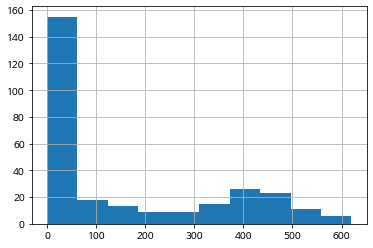

In [8]:
# 타수가 없거나 적은선수들은 분석에 방해가 될 수 있음. 지나치게 높은값 또는 지나치게 낮은값을 가짐
# 어느정도가 적은지 판단하기 위해, 타수 데이터 분포를 살펴봄
# sns.hisplot을 이용해도 되고, 판다스에서 기본적 내장된 시리즈 hist()를 이용해 살펴볼수 있음.

data_player['타수'].hist()

In [9]:
# 타수가 50보다 큰선수들만 선택
# reset_index()를 이용해 현재 인덱스로 설정된 팀/이름/생일 데이터 컬럼으로 변경

cond = data_player['타수'] > 50

cond

팀    이름   생일        
KIA  고영창  1989-02-24    False
     김선빈  1989-12-18     True
     김세현  1987-08-07    False
     김주찬  1981-03-25     True
     나지완  1985-05-19     True
                        ...  
한화   최윤석  1987-03-28    False
     최재훈  1989-08-27     True
     최진행  1985-08-17     True
     하주석  1994-02-25    False
     호잉   1989-05-18     True
Name: 타수, Length: 285, dtype: bool

In [10]:
data_player[cond]

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
    류승현 1997-07-01   48   9   4   38  150  14   0   0
    박찬호 1995-06-05  160  26   4  131  504  49   2   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  정은원 2000-01-17  211  48   0  148  564  57   8   6
    지성준 1994-04-10   38   5   0   26  104  11   2   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[137 rows x 8 columns]

In [11]:
data_player[cond].reset_index()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2
...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1


In [12]:
data_player = data_player[cond].reset_index()
data_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


In [13]:
# 타율/출루율/장타율/ops/를 계산하는 "함수"를 만듬
# 데이터 프레임을 입력하면, 해당 데이터 프레임에서 인덱스별 실적을 계산, 변환시킴

def cal_hit(df):
  df['타율'] = df['안타'] / df['타수']
  df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
  df['장타율'] = df['루타'] / df['타수']
  df['OPS'] = df['출루율'] + df['장타율']

  return df

In [14]:
#data_player 에 있는 선수별 실적을 이용해서 타율, 출루율, 장타율, ops 불러오기

cal_hit(data_player)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.343860,0.374113,0.717973
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.298077,0.365385,0.663462
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.316667,0.435897,0.752564


In [15]:
player_stat = cal_hit(data_player)

player_stat

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.343860,0.374113,0.717973
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.298077,0.365385,0.663462
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.316667,0.435897,0.752564


In [16]:
# 앞의 DF을 활용하여 KBO최고 타자 성적순 정렬 
# 출루율을 기준으로 정렬하여 장타율 ops 타율순으로 기준 정렬임

player_stat.sort_values(by = ['출루율', '장타율', 'OPS', '타율'], ascending = False)

player_stat.reset_index(drop = True)
# = 인덱스 초기화 기존에 있던 0~ 가진 인덱스를 드랍하고 새로 인덱스 0번부터 부여

player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147
5,KIA,신범수,1998-01-25,23,7,1,12,57,7,2,0,0.210526,0.344828,0.403509,0.748336
6,KIA,안치홍,1990-07-02,149,40,1,114,362,49,5,5,0.314917,0.421196,0.411602,0.832798
7,KIA,유민상,1989-04-13,81,24,3,51,175,26,5,0,0.291429,0.438202,0.462857,0.901059
8,KIA,이우성,1994-07-17,55,12,2,33,151,22,6,2,0.218543,0.303226,0.364238,0.667464
9,KIA,이창진,1991-03-04,153,57,4,108,400,48,6,5,0.270000,0.413203,0.382500,0.795703


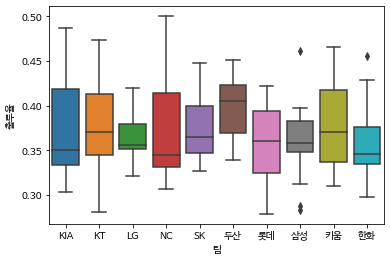

In [18]:
# 팀별 선수 출루율 분포를 boxplot을 이용

import seaborn as sns

sns.boxplot(data = player_stat, x = '팀', y = '출루율')

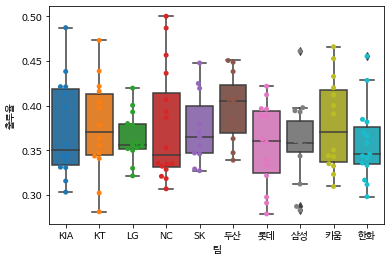

In [19]:
# 팀별 선수 출루율 분포를 swarmplot과 boxplot을 이용해 살펴본다.

sns.boxplot(data = player_stat, x = '팀', y = '출루율')
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')

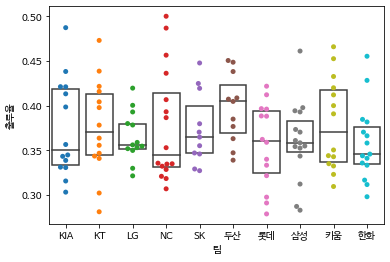

In [23]:
# 위에처럼 두개의 플랏 모두 색상이 겹친다면 구분하기 힘듬
# 그래서 박스플랏에 옵션을 조금 추가한다.
#sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
#sns.boxplot(data = player_stat, x = '팀', y = '출루율',
#            showcaps=False,             # 박스 상단 가로라인 보이지 않기
#           whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
#           showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
#            boxprops={'facecolor':'None'}, # 박스 색상 지우기
#           )

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
            showcaps = False, whiskerprops={'linewidth' : 0}, showfliers=False,
            boxprops={'facecolor':'None'})

In [ ]:
# 타자별 2019년 기록 데이터를 저장하겠습니다. 
# MS-엑셀에서도 파일을 조회할 수 있도록 encoding = 'cp949' 로 저장을 하였으며, 
# index 에 들어있는 0부터 시작하는 번호는 저장하지 않도록 index = False 를 사용하였습니다. 
file = './data/player_stat.csv'
player_stat.to_csv(file, encoding = 'cp949', index = False)